In [ ]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 45.2MB/s 
     |████████████████████████████████| 501kB 57.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [ ]:
# os.getcwd()
cd "/content/drive/My Drive/AI content/intern"

/content/drive/My Drive/AI content/intern


In [ ]:
import urllib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import os
import cv2
import glob
import os
import time
from PIL import Image
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
from tensorflow import keras


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
os.chdir('/content/drive/My Drive/AI content/intern')
print(os.getcwd())
df = pd.read_json("Indian_Number_plates.json", lines=True)
df.head()

/content/drive/My Drive/AI content/intern


,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [ ]:
# os.mkdir("Indian_number_plates")

NameError: ignored

In [ ]:
dataset = dict()
dataset["image_name"] = list()
dataset["image_width"] = list()
dataset["image_height"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()

counter = 0
for index, row in df.iterrows():
    # img = urllib.request.urlopen(row["content"])
    # img = Image.open(img)
    # img = img.convert('RGB')
    # img.save("Indian_number_plates/licensed_car{}.jpeg".format(counter), "JPEG")
    
    dataset["image_name"].append("licensed_car{}".format(counter))
    
    data = row["annotation"]
    
    dataset["image_width"].append(data[0]["imageWidth"])
    dataset["image_height"].append(data[0]["imageHeight"])
    dataset["top_x"].append(data[0]["points"][0]["x"])
    dataset["top_y"].append(data[0]["points"][0]["y"])
    dataset["bottom_x"].append(data[0]["points"][1]["x"])
    dataset["bottom_y"].append(data[0]["points"][1]["y"])
    
    counter += 1
    
print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


In [ ]:
def get_size(start_path = '/content/drive/My Drive/AI content/intern/Indian_number_plates'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                # print('y')
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

13470820 bytes


In [ ]:
df = pd.DataFrame(dataset)
df.head()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014


In [ ]:
df.to_csv("indian_license_plates.csv", index=False)

In [ ]:
df = pd.read_csv("indian_license_plates.csv")
df["image_name"] = df["image_name"] + ".jpeg"
df.drop(["image_width", "image_height"], axis=1, inplace=True)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [ ]:
def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
x1 = df['image_width']*df['top_x']
x2 = df['image_width']*df['bottom_x']
y1 = df['image_height']*df['top_y']
y2 = df['image_height']*df['bottom_y']

In [ ]:
x1 = 500*df['top_x']
x2 = 500*df['bottom_x']
y1 = 500*df['top_y']
y2 = 500*df['bottom_y']

In [ ]:
os.chdir("Indian_number_plates")
filename = 'licensed_car'+str(0)+'.jpeg'
image = cv2.imread(filename)
image.shape

(466, 806, 3)

In [ ]:
train_images = []
train_labels = []
for i in range(232):
  print(i)
  filename = 'licensed_car'+str(i)+'.jpeg'
  imae = cv2.imread(filename)
  imae = cv2.resize(imae,(500,500),interpolation = cv2.INTER_AREA)
  gtvalues=[]
  gtvalues.append({"x1":int(x1[i]),"x2":int(x2[i]),"y1":int(y1[i]),"y2":int(y2[i])})
  ss.setBaseImage(imae)   # setting given image as base image
  ss.switchToSelectiveSearchFast()     # running selective search on bae image 
  ssresults = ss.process()
  imout = imae.copy()
  # print(imae.shape)
  counter = 0
  falsecounter = 0
  flag = 0
  fflag = 0
  bflag = 0
  for e,result in enumerate(ssresults):
    if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
      for gtval in gtvalues:
        x,y,w,h = result
        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
        if counter < 10:       # getting only 30 psoitive examples
            if iou > 0.70:     # IoU or being positive is 0.7
              timage = imout[y:y+h,x:x+w]
              resized = cv2.resize(timage, (200,100), interpolation = cv2.INTER_AREA)
              train_images.append(resized)
              train_labels.append(1)
              counter += 1
        else :
            fflag =1              # to insure we have collected all psotive examples
        if falsecounter <10:      # 30 negatve examples are allowed only
            if iou < 0.3 and w>70 and h>15:         # IoU or being negative is 0.3
              timage = imout[y:y+h,x:x+w]
              resized = cv2.resize(timage, (200,100), interpolation = cv2.INTER_AREA)
              train_images.append(resized)
              train_labels.append(0)
              falsecounter += 1
        else :
            bflag = 1             #to ensure we have collected all negative examples
            if fflag == 1 and bflag == 1:  
              print("inside")
              flag = 1   
    else:
      continue     # to signal the complition of data extaction from a particular image

0
(500, 500, 3)
1
(500, 500, 3)
2
(500, 500, 3)
3
(500, 500, 3)
4
(500, 500, 3)
inside
5
(500, 500, 3)
6
(500, 500, 3)
7
(500, 500, 3)
8
(500, 500, 3)
9
(500, 500, 3)
inside
10
(500, 500, 3)
11
(500, 500, 3)
12
(500, 500, 3)
inside
13
(500, 500, 3)
14
(500, 500, 3)
15
(500, 500, 3)
16
(500, 500, 3)
17
(500, 500, 3)
18
(500, 500, 3)
19
(500, 500, 3)
inside
20
(500, 500, 3)
21
(500, 500, 3)
22
(500, 500, 3)
23
(500, 500, 3)
inside
24
(500, 500, 3)
25
(500, 500, 3)
26
(500, 500, 3)
inside
27
(500, 500, 3)
inside
28
(500, 500, 3)
inside
29
(500, 500, 3)
inside
30
(500, 500, 3)
inside
31
(500, 500, 3)
32
(500, 500, 3)
inside
33
(500, 500, 3)
34
(500, 500, 3)
inside
35
(500, 500, 3)
inside
36
(500, 500, 3)
inside
37
(500, 500, 3)
38
(500, 500, 3)
inside
39
(500, 500, 3)
40
(500, 500, 3)
41
(500, 500, 3)
42
(500, 500, 3)
43
(500, 500, 3)
44
(500, 500, 3)
45
(500, 500, 3)
46
(500, 500, 3)
47
(500, 500, 3)
48
(500, 500, 3)
inside
49
(500, 500, 3)
50
(500, 500, 3)
51
(500, 500, 3)
52
(500, 500, 

KeyboardInterrupt: ignored

In [ ]:
# len(train_images)
np_train_images = np.array(train_images)
np_train_labels = np.array(train_labels)

In [ ]:
np_train_images.shape

(1858, 100, 200, 3)

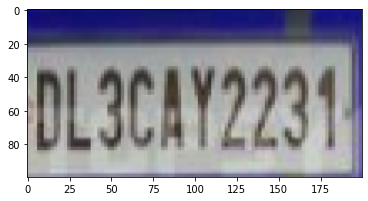

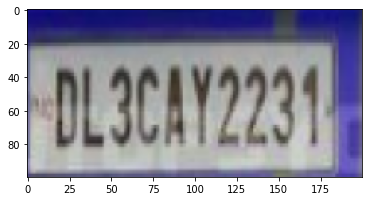

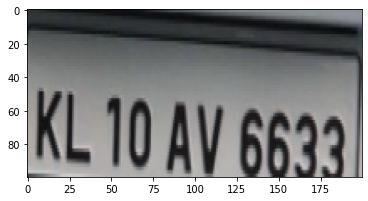

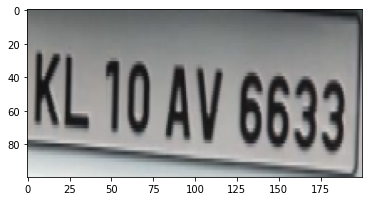

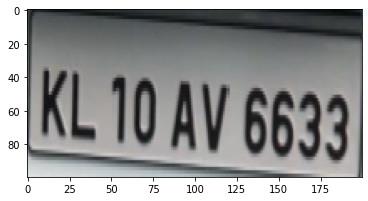

In [ ]:
counter = 0
for i in range(1400,1858):
  if(np_train_labels[i]==1):
    counter+=1
    plt.imshow(np_train_images[i])
    plt.show()
    if(counter>4):
      break
    

In [ ]:
# cv2.setUseOptimized(True);
# ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
# from tensorflow import keras
vgg = tf.keras.applications.vgg16.VGG16(include_top=False , weights='imagenet', input_tensor=None, input_shape=(None,100,200,3), pooling=None, classes=2)
for layer in vgg.layers[:-2]:
  layer.trainable = False
last_output =  vgg.output
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128,"sigmoid")(x)
x = tf.keras.layers.Dense(64,'relu')(x)
x = tf.keras.layers.Dense(32,'relu')(x)
x = tf.keras.layers.Dense(16,'relu')(x)
x = tf.keras.layers.Dense(4,'sigmoid')(x)
x = tf.keras.layers.Dense(2,activation = 'softmax')(x)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
Y = np.zeros((1858,2))
for i in range(1858):
  if(train_labels[i]==0):
    Y[i][0] = 1
  else:
    Y[i][1] = 1

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 100, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 100, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 100, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 50, 128)       0   

In [ ]:
history = []
for i in range(10):
  hist = model.fit(np_train_images,Y,batch_size=32,epochs=1,shuffle = True)
  history.append(hist)
  model.save_weights("model_weight.h5")

Train on 1858 samples
1858/1858 [==============================] - 212s 114ms/sample - loss: 0.3608 - acc: 0.7734
Train on 1858 samples
1858/1858 [==============================] - 209s 113ms/sample - loss: 0.2688 - acc: 0.9645
Train on 1858 samples
1858/1858 [==============================] - 205s 110ms/sample - loss: 0.2468 - acc: 0.9752
Train on 1858 samples
1858/1858 [==============================] - 204s 110ms/sample - loss: 0.2409 - acc: 0.9699
Train on 1858 samples
1858/1858 [==============================] - 204s 110ms/sample - loss: 0.2151 - acc: 0.9774
Train on 1858 samples
1858/1858 [==============================] - 204s 110ms/sample - loss: 0.2511 - acc: 0.9526
Train on 1858 samples
1858/1858 [==============================] - 204s 110ms/sample - loss: 0.2052 - acc: 0.9682
Train on 1858 samples
1858/1858 [==============================] - 205s 110ms/sample - loss: 0.1973 - acc: 0.9688
Train on 1858 samples
 832/1858 [============>.................] - ETA: 1:52 - loss: 0.2

KeyboardInterrupt: ignored

In [ ]:
#model 3
# vgg2 = tf.keras.applications.vgg16.VGG16(include_top=True , weights='imagenet', input_tensor=None, pooling=None, classes=1000)
# for layer in vgg2.layers[:-2]:
#   layer.trainable = False
x = vgg2.layers[-2].output
x = tf.keras.layers.Dense(128,"sigmoid")(x)
x = tf.keras.layers.Dense(64,'relu')(x)
x = tf.keras.layers.Dense(32,'relu')(x)
x = tf.keras.layers.Dense(4,'sigmoid')(x)
model3 = tf.keras.Model(vgg2.input,x)


In [ ]:
model3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
X4 = []
Y4 = []
for i in range(232):
  print(i)
  filename = 'licensed_car'+str(i)+'.jpeg'
  imae = cv2.imread(filename)
  imae = cv2.resize(imae,(224,224),interpolation = cv2.INTER_AREA)
  X4.append(imae)
  Y4.append([x1[i],y1[i],x2[i],y2[i]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231


In [ ]:
model3.compile(
    'adam',loss = 'mean_squared_error'
)

In [ ]:
# np_X4 = np_X4/255
# np_Y4 = np.array(Y4)/500
history = []
for i in range(60):
  hist = model3.fit(np_X4,np_Y4,batch_size = 32,verbose = 1,epochs = 1)
  history.append(hist)
  model3.save_weights('model3.h5')

Train on 232 samples
232/232 [==============================] - 69s 297ms/sample - loss: 0.0346
Train on 232 samples
232/232 [==============================] - 69s 296ms/sample - loss: 0.0257
Train on 232 samples
232/232 [==============================] - 68s 294ms/sample - loss: 0.0264
Train on 232 samples
232/232 [==============================] - 68s 295ms/sample - loss: 0.0258
Train on 232 samples
232/232 [==============================] - 68s 292ms/sample - loss: 0.0257
Train on 232 samples
232/232 [==============================] - 68s 292ms/sample - loss: 0.0257
Train on 232 samples
232/232 [==============================] - 67s 288ms/sample - loss: 0.0259
Train on 232 samples
232/232 [==============================] - 67s 288ms/sample - loss: 0.0255
Train on 232 samples
232/232 [==============================] - 66s 285ms/sample - loss: 0.0256
Train on 232 samples
232/232 [==============================] - 68s 292ms/sample - loss: 0.0255
Train on 232 samples
192/232 [==========

KeyboardInterrupt: ignored

(224, 224, 3)


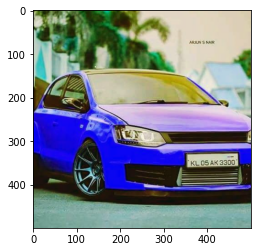

In [ ]:
i  = np.random.randint(0,237)
i = 81
img = cv2.imread('licensed_car'+str(i)+'.jpeg')
# print(os.getcwd())
# print(img.shape)
# img2 = cv2.resize(img,(224,224),interpolation = cv2.INTER_AREA)
# img = np.flip(img, axis=2)
img = cv2.resize(img,(500,500),interpolation = cv2.INTER_AREA)
ss.setBaseImage(img)   # setting given image as base image
ss.switchToSelectiveSearchFast()     # running selective search on bae image 
ssresults = ss.process()
imout = img.copy()
print(imae.shape)
counter = 0
falsecounter = 0
flag = 0
fflag = 0
bflag = 0
test = []
for e,result in enumerate(ssresults):
  if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
    x,y,w,h = result
    if w<65 or h<15:
      continue
    else:
      timage = imout[y:y+h,x:x+w]
      resized = cv2.resize(timage, (200,100), interpolation = cv2.INTER_AREA)
      test.append(resized)
      
plt.imshow(img)

In [ ]:
test = np.array(test)
out = model.predict(test)
print(test.shape)

(885, 100, 200, 3)


[0.31384578 0.68615425]


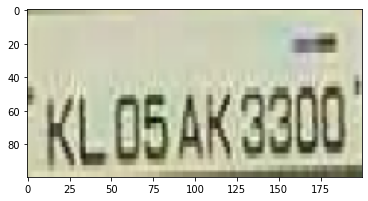

[0.31384578 0.68615425]


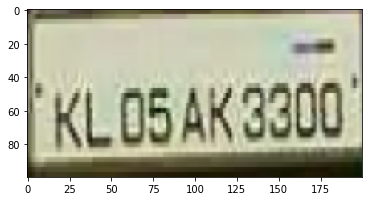

[0.31384578 0.68615425]


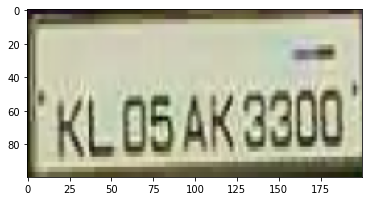

[0.31384578 0.68615425]


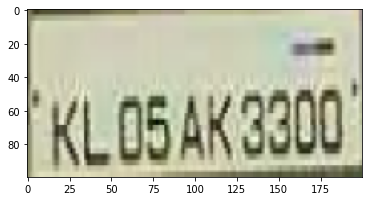

[0.31384578 0.68615425]


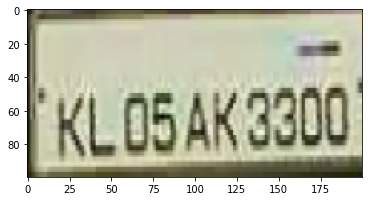

5


In [ ]:
counter = 0
for i in range(test.shape[0]):
  if(out[i][0]<0.35):
    print(out[i])
    plt.imshow(test[i])
    plt.show()
    counter+=1
    if(counter>4):
      break
print(counter)

In [ ]:
print(i)

72


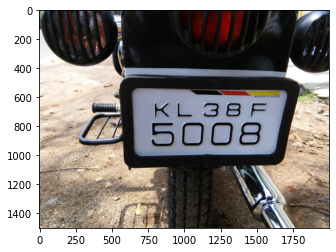

In [ ]:
img = cv2.imread('licensed_car170.jpeg')
img = np.flip(img,axis = 2)
plt.imshow(img)
plt.show()


In [ ]:
np_Y4[10]

array([0.31152648, 0.345     , 0.65732087, 0.5475    ])

In [ ]:
(np_Y4[10][2]+np_Y4[10][0])

0.968847352024921

In [ ]:
x1 = np.array(train_images[156])

(100, 200, 3)

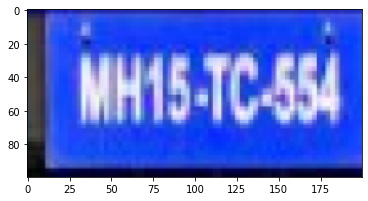

In [ ]:
plt.imshow(x1)

In [ ]:
for i in range(50):
  if(train_labels[i]==1):
    print(i)
    break

0


In [ ]:
np_X4.shape

(232, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


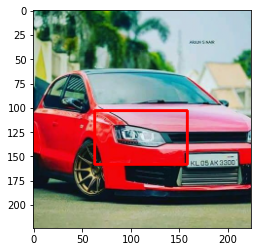

In [ ]:
i = np.random.randint(0,237)
temp = np_X4[i]
temp = np.expand_dims(temp,axis = 0)
out = model3.predict(temp)
start_point = (int(out[0][0]*224), int(out[0][1]*224)) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (int(out[0][2]*224), int(out[0][3]*224)) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
image = temp[0]
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
plt.imshow(image)

In [ ]:
print(i)

81


In [ ]:
start_point = (int(out[0][0]*224), int(out[0][1]*224)) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (int(out[0][2]*224), int(out[0][3]*224)) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
image = temp[0]
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


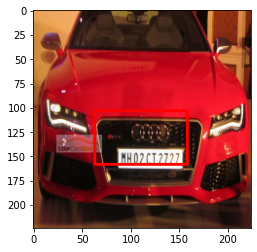

In [ ]:
plt.imshow(image)